# Math 10 Final Project

Author: Jerry Yang

Course Project, UC Irvine, Math 10, Spring 25

I would like to post my notebook on the course's website. [Yes]

## Introduction

This project explore satellite imagery metadata from the **Landsat program**, which has been monitoring Earth from space since the 1970s.

But here’s the catch: even with fancy satellites, a lot of images end up being covered by clouds, making them less useful for analysis. That’s where my project comes in.

In this notebook, I’ll dive into a dataset of Landsat scenes and analyze:

- how cloudy those scenes are,

- where they were taken,

- whether we can spot any interesting patterns in space or time.

No actual images here — just metadata — but there’s still a lot we can learn.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("landsat_ot_c2_l2_data.csv")
df.head()

,id,Landsat Product Identifier L2,Landsat Product Identifier L1,UL_LAT,UL_LON,Date Acquired,Landsat Scene Identifier,UR_LAT,Path,Row,...,Metadata_Date,Metadata_Review_Date,Metadata_Standard_Name,Metadata_Standard_Version,Metadata_Time_Convention,Metadata_Access_Constraints,Metadata_Use_Constraints,Metadata_Security_Classification_System,Metadata_Security_Classification,Metadata_Security_Handling_Description
0,LC09_L2SP_007001_20250609_20250610_02_T2,LC09_L2SP_007001_20250609_20250610_02_T2,LC09_L1GT_007001_20250609_20250609_02_T2,81.92443,-14.08825,2025/06/09,LC90070012025160LGN00,81.78445,7,1,...,20161128,As Needed,Content Standard for Digital Geospatial Metadata,"FGDC-STD-001-1998, Version 2",Local Time,NaN,NaN,NaN,Unclassified,NaN
1,LC09_L2SP_007002_20250609_20250610_02_T2,LC09_L2SP_007002_20250609_20250610_02_T2,LC09_L1GT_007002_20250609_20250609_02_T2,81.16828,-21.21916,2025/06/09,LC90070022025160LGN00,81.09631,7,2,...,20161128,As Needed,Content Standard for Digital Geospatial Metadata,"FGDC-STD-001-1998, Version 2",Local Time,NaN,NaN,NaN,Unclassified,NaN
2,LC09_L2SP_007003_20250609_20250610_02_T2,LC09_L2SP_007003_20250609_20250610_02_T2,LC09_L1GT_007003_20250609_20250609_02_T2,80.28819,-27.01063,2025/06/09,LC90070032025160LGN00,80.23387,7,3,...,20161128,As Needed,Content Standard for Digital Geospatial Metadata,"FGDC-STD-001-1998, Version 2",Local Time,NaN,NaN,NaN,Unclassified,NaN
3,LC09_L2SP_007004_20250609_20250610_02_T2,LC09_L2SP_007004_20250609_20250610_02_T2,LC09_L1GT_007004_20250609_20250609_02_T2,79.31125,-31.67991,2025/06/09,LC90070042025160LGN00,79.22879,7,4,...,20161128,As Needed,Content Standard for Digital Geospatial Metadata,"FGDC-STD-001-1998, Version 2",Local Time,NaN,NaN,NaN,Unclassified,NaN
4,LC09_L2SP_007005_20250609_20250610_02_T2,LC09_L2SP_007005_20250609_20250610_02_T2,LC09_L1GT_007005_20250609_20250609_02_T2,78.14803,-35.99241,2025/06/09,LC90070052025160LGN00,78.27357,7,5,...,20161128,As Needed,Content Standard for Digital Geospatial Metadata,"FGDC-STD-001-1998, Version 2",Local Time,NaN,NaN,NaN,Unclassified,NaN


In [10]:
df_numeric = df.select_dtypes(include="number").dropna(axis=1, how="all")
df_numeric

,UL_LAT,UL_LON,UR_LAT,Path,Row,UR_LON,Collection Number,LR_LAT,LR_LON,WRS Path,...,Corner Lower Left Latitude,Corner Lower Left Longitude,Corner Lower Right Latitude,Corner Lower Right Longitude,Publication_Date,Calendar_Date,G-Ring_Latitude,G-Ring_Longitude,Process_Date,Metadata_Date
0,81.92443,-14.08825,81.78445,7,1,2.80178,2,79.44497,0.18110,7,...,79.55308,-12.94016,79.44497,0.18110,20060510,20250609,79.55308,-12.94016,20161030,20161128
1,81.16828,-21.21916,81.09631,7,2,-5.38473,2,78.69609,-7.42083,7,...,78.75242,-19.89199,78.69609,-7.42083,20060510,20250609,78.75242,-19.89199,20161030,20161128
2,80.28819,-27.01063,80.23387,7,3,-12.44168,2,77.80166,-14.13823,7,...,77.84488,-25.81259,77.80166,-14.13823,20060510,20250609,77.84488,-25.81259,20161030,20161128
3,79.31125,-31.67991,79.22879,7,4,-18.43869,2,76.79419,-20.00452,7,...,76.86097,-30.81729,76.79419,-20.00452,20060510,20250609,76.86097,-30.81729,20161030,20161128
4,78.14803,-35.99241,78.27357,7,5,-23.95306,2,75.81661,-24.47291,7,...,75.71330,-34.47511,75.81661,-24.47291,20060510,20250609,75.71330,-34.47511,20161030,20161128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,78.16178,18.72528,78.25811,23,239,30.67785,2,75.81321,30.05340,23,...,75.73388,20.11828,75.81321,30.05340,20060510,20250609,75.73388,20.11828,20161030,20161128
96,79.39651,14.36228,79.14579,23,240,27.49811,2,76.73914,25.23379,23,...,76.94237,14.48058,76.73914,25.23379,20060510,20250609,76.94237,14.48058,20161030,20161128
97,80.26667,7.73888,80.26611,23,241,22.28740,2,77.82788,20.83817,23,...,77.82832,9.18297,77.82788,20.83817,20060510,20250609,77.82832,9.18297,20161030,20161128
98,81.23311,1.63055,80.97509,23,242,16.90901,2,78.66764,14.06356,23,...,78.87107,1.91861,78.66764,14.06356,20060510,20250609,78.87107,1.91861,20161030,20161128


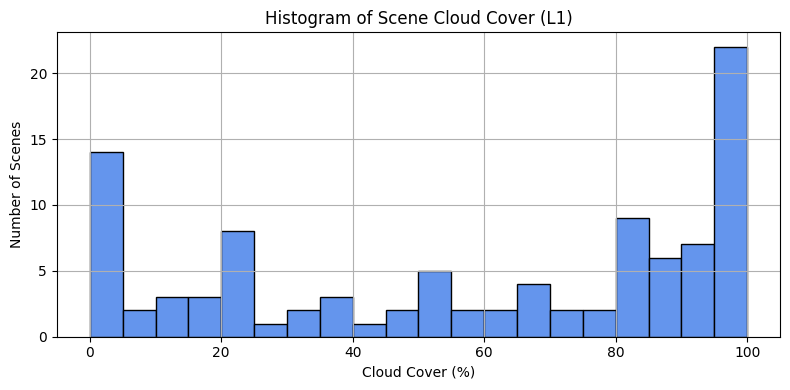

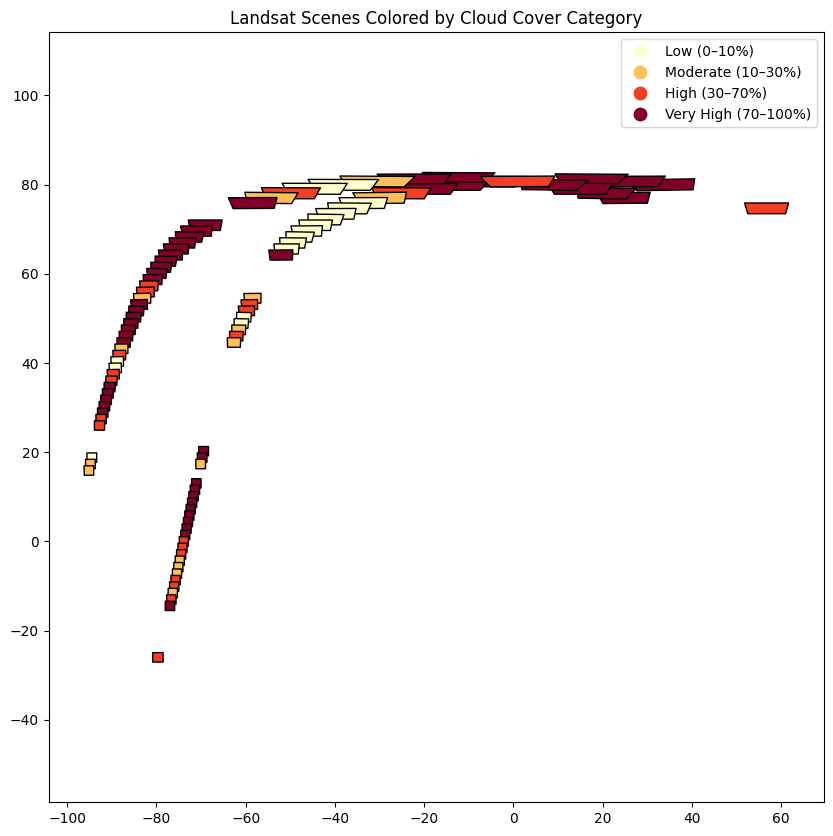